# Isolating Fundamental Relations: A Comparative Study of Operator-Based Approaches

**Experiment Date:** May 2, 2025    
**Researcher(s):** Ashley Kelly (Conceptualization, Initial Draft), Michael G. Young II, contributing to revision/analysis  
**Affiliation:** Emergenics Foundation  

## Abstract

Inspired by Möbius inversion principles in number theory, this computational notebook initially explored a "prime-collapse" operator defined via a truncated power series, \( C[R] \approx \sum_{n=1}^k \mu(n) R^n \), aiming to isolate irreducible or fundamental relationships within general systems represented by matrices \( R \) (e.g., graph adjacency, spatial kernels). However, preliminary investigations revealed this truncated approximation often yields uninterpretable results or numerical instability. This revised study compares the mathematically rigorous application of Möbius inversion (via matrix inverse) on the divisibility lattice with an alternative, stable method – **Spectral Filtering** – applied to molecular graphs and spatial kernels. Spectral filtering reconstructs an operator \( C_{\text{spectral}} \) using only the dominant eigenmodes of the original operator \( R \). We analyze the structure, locality, and spectral properties of the results obtained from both exact inversion (where applicable) and spectral filtering. The findings demonstrate that while true Möbius inversion works correctly for the divisibility poset, the truncated series fails generally. Spectral filtering provides a stable alternative for identifying dominant relational modes, though the resulting "backbone" reflects these global modes rather than necessarily isolating local, irreducible links like chemical bonds. This work clarifies the limitations of the truncated series approach and validates spectral filtering as a robust tool for analyzing dominant structures within relational operators.

## 1. Introduction and Background

Understanding complex systems often involves identifying the fundamental entities and their most direct, irreducible interactions, distinguishing them from indirect or composite relationships that emerge from combinations of simpler links. In number theory and combinatorics, **Möbius inversion** provides a powerful algebraic tool for achieving this on partially ordered sets (posets), most famously on the integers ordered by divisibility (Rota, 1964). For the "sum over divisors" function (\( \zeta \)), its inverse is the Möbius function (\( \mu \)), which effectively uses inclusion-exclusion to isolate primitive arithmetic contributions.

This notebook initially aimed to generalize this principle to arbitrary relational structures (networks, spatial fields) represented by a matrix or operator \( R \). The formal analogy suggested a "prime-collapse" operator defined by the infinite series \( C[R] = \sum_{n=1}^\infty \mu(n) R^n \), hypothetically cancelling out composite relations (longer paths/interactions) weighted by \( \mu(n) \).

However, implementing this via a **severely truncated series** (e.g., \( k=3 \) or \( k=4 \)) proved problematic in initial explorations. For general matrices like graph adjacency matrices (\( A \)) or spatial correlation kernels (\( G \)), this approximation often failed to produce meaningful results, leading instead to dense connection patterns dominated by negative interference terms or numerical instability upon iteration. The delicate cancellations required for true Möbius inversion are typically lost in such drastic truncations.

Given these limitations, this study adopts a revised approach. We retain the successful demonstration of exact Möbius inversion on the divisibility lattice (Example 1) but replace the flawed truncated series method for general graphs and kernels with **Spectral Filtering**. This alternative leverages the **Spectral Theorem** (discussed in Chapter 2 of the accompanying text), which guarantees that symmetric/Hermitian operators \( R \) can be decomposed into fundamental eigenmodes (\( v_i \)) and real eigenvalues (\( \lambda_i \)). By reconstructing an operator \( C_{\text{spectral}} \) using only the most "significant" modes (e.g., those with the largest \( |\lambda_i| \)), we aim to provide a stable and interpretable method for identifying dominant relational structures.

## 2. Objectives

This computational study aims to:

1.  **Verify Exact Inversion:** Demonstrate the correct application of Möbius inversion in its native context by computing the matrix inverse of the Zeta matrix for the divisibility lattice and confirming its identity with the Möbius function matrix (Example 1).
2.  **Implement Spectral Filtering:** Apply spectral filtering (reconstruction from dominant eigenmodes based on eigenvalue magnitude) to the adjacency matrix of a molecule (Ethanol, Example 2) and to exponential decay kernels in 1D and 2D (Examples 3 & 4).
3.  **Analyze Filtered Structures:** Analyze the properties of the resulting filtered matrices \( C_{\text{spectral}} \) and the corresponding "backbone" graphs derived by thresholding them. Assess changes in structure, locality (diagonal vs. off-diagonal strength), and spectral properties compared to the original operators.
4.  **Compare Methods:** Contrast the stable, interpretable results from spectral filtering with the previously observed failures (dense graphs, instability) of the truncated Möbius series approximation for graphs and kernels, thereby evaluating the suitability of spectral filtering as an alternative method for identifying dominant relational patterns.

## 3. Methods

*   **Systems Studied:**
    *   **Divisibility Lattice:** Integers 1 to 20, relation `d|n`. Operator: Zeta matrix `Z`.
    *   **Molecular Graph:** Ethanol molecule (9 atoms, 8 bonds). Operator: Adjacency matrix `A`.
    *   **1D Kernel:** 20 points on a line. Operator: Kernel matrix `G_1d` with \( G_{ij} = e^{-m|i-j|} \).
    *   **2D Kernel:** 64 points on an 8x8 grid. Operator: Kernel matrix `G_2d` with \( G_{ij} = e^{-m||pos_i - pos_j||} \).
*   **Operators & Analysis:**
    *   **Example 1:** Direct matrix inversion (`numpy.linalg.inv`) of the Zeta matrix. Verification using `sympy.mobius`.
    *   **Examples 2, 3, 4:**
        *   Eigenvalue Decomposition: Using `scipy.linalg.eigh` to compute eigenvalues (\( \lambda_i \)) and eigenvectors (\( v_i \)) of the symmetric matrices \( A \) and \( G \).
        *   **Spectral Filtering:** Selecting the `k` eigenvectors corresponding to the `k` largest *magnitude* eigenvalues (\( |\lambda_i| \)). Reconstructing the filtered matrix \( C_{\text{spectral}} = \sum_{i \in \text{top k}} \lambda_i v_i v_i^T \). The number `k` was chosen heuristically (e.g., `k=#edges` for molecule, `k=5` for 1D, `k=10` for 2D).
        *   **Backbone Extraction:** Creating graphs by adding edges between nodes `i` and `j` where the absolute value of the corresponding entry in the filtered matrix, \( |(C_{\text{spectral}})_{ij}| \), exceeds a defined threshold (e.g., a high percentile like 95th or 98th, or an absolute value like 1.0).
        *   **Visualization:** Heatmaps for kernel matrices, network graphs for the molecule and extracted backbones, eigenvalue spectrum plots.
        *   **Locality Analysis (Kernels):** Comparing the ratio of the sum of absolute diagonal magnitudes to the sum of absolute off-diagonal magnitudes between the original kernel \( G \) and the filtered kernel \( C_{\text{spectral}} \).

## 4. Results Summary

*   **Example 1 (Divisibility):** Matrix inversion of the Zeta matrix correctly yielded the expected Möbius function matrix, confirming the validity of exact Möbius inversion for this specific poset structure.
*   **Example 2 (Ethanol Molecule):** Spectral filtering (top 8 modes, threshold \( |C_{ij}| > 1.00 \)) resulted in an extremely sparse backbone graph containing only 2 edges (C1-C2, O-H6). This highlights connections participating strongly in dominant global eigenmodes but fails to recover the local chemical bond structure.
*   **Example 3 (1D Kernel):** Spectral filtering (top 5 modes) produced a smoother kernel \( C_{\text{spectral}} \) compared to the original \( G \). Locality analysis showed the filtered kernel was *less* localized (Ratio G: 0.192 vs Ratio C: 0.146), emphasizing the influence of the dominant, longer-range eigenmodes.
*   **Example 4 (2D Kernel):** Spectral filtering (top 10 modes) again yielded a smoother kernel \( C_{\text{spectral}} \). The eigenvalue plot confirmed that only the largest magnitude eigenvalues were retained. The extracted backbone graph showed a grid-like structure reflecting the geometry of the dominant low-frequency eigenvector, rather than simple nearest-neighbor links. The dominant eigenvector itself displayed a smooth, large-scale spatial pattern. Iterating the *truncated* operator (from original attempts) led to numerical divergence, contrasting with the stability of spectral filtering.

## 5. Discussion

The results clearly differentiate between the mathematically sound Möbius inversion on the divisibility lattice and the attempt to generalize it via a truncated power series.

*   **Failure of Truncated Series:** The preliminary work and the results from the original version of this notebook (especially Example 4's divergence) demonstrate that \( C[R] \approx \sum_{n=1}^k \mu(n) R^n \) is not a reliable or stable method for isolating fundamental relations in general graphs or kernels. The truncation breaks the necessary inclusion-exclusion properties and often amplifies noise or indirect connections.
*   **Success and Interpretation of Spectral Filtering:** Spectral filtering provides a stable, mathematically well-defined alternative. It successfully decomposes the operator based on its fundamental modes. However, filtering based on the *largest magnitude* eigenvalues (as performed here) tends to isolate **dominant global patterns and large-scale correlations**.
    *   For the molecule, it highlighted bonds potentially central to the overall structure's principal modes, not all local bonds.
    *   For the kernels, it revealed the smoothest, lowest-frequency correlation patterns, reducing apparent locality.
    *   The resulting "backbone" is therefore not necessarily one of "irreducible local links" but rather the structure most strongly associated with the *selected dominant eigenmodes*. Different filtering criteria (e.g., targeting specific eigenvalue ranges or eigenvectors with specific properties) might yield different kinds of backbone structures.

## 6. Conclusion

While the conceptual link between Möbius inversion and isolating "prime" or "irreducible" components is intriguing, the direct application via a truncated power series \( \sum \mu(n) R^n \) is **not a valid general method** for relational matrices like graph adjacency or spatial kernels, often leading to instability or uninterpretable results.

**Spectral filtering**, based on decomposing the operator \( R \) into its eigenvalues and eigenvectors (\( R = \sum \lambda_i v_i v_i^\dagger \)) and reconstructing using a subset of modes, offers a **robust and interpretable alternative**. It allows for the identification and analysis of dominant relational patterns inherent in the system's spectral blueprint. The specific structure revealed depends heavily on the criteria used for selecting significant modes (e.g., largest magnitude \( |\lambda_i| \)). This study validates spectral filtering as a useful tool for simplifying and understanding the core components of relational operators within the **Computational Fabric**, even if it answers a slightly different question than the one initially posed by the flawed "prime-collapse" operator concept.

## 7. Future Work / Limitations

*   Investigate convergence properties of the infinite series \( \sum \mu(n) R^n \) for different matrix classes.
*   Explore alternative methods for computing or approximating the infinite series if convergent.
*   Apply spectral filtering using different mode selection criteria (e.g., based on localization of eigenvectors, specific eigenvalue ranges related to graph properties like the Fiedler value) to potentially isolate different types of "fundamental" structures.
*   The interpretation of "irreducible" remains context-dependent; spectral filtering isolates dominant *modes*, which may or may not align with intuitive notions of basic links in all systems.

## 8. Code Usage

The notebook contains Python code using `numpy`, `pandas`, `networkx`, `matplotlib`, and `scipy.linalg`. Execute cells sequentially to reproduce the analysis. Example 1 requires `sympy` for verification. Ensure necessary libraries are installed.

## 9. References

*   Apostol, T. M. (1976). *Introduction to Analytic Number Theory*. Springer.
*   Rota, G.-C. (1964). On the Foundations of Combinatorial Theory I. Theory of Möbius Functions. *Zeitschrift für Wahrscheinlichkeitstheorie und verwandte Gebiete*, 2, 340–368.
*   Chung, F. R. K. (1997). *Spectral Graph Theory*. American Mathematical Society. *(General reference for graph spectra)*
*   Newman, M. E. J. (2010). *Networks: An Introduction*. Oxford University Press. *(General reference for network analysis)*


### I just came up with spectral filtering as the specific fix or alternative approach within the context of addressing the problems in Ashs original "Prime-Collapse" notebook idea. It leverages spectral concepts we were already familiar with but applies them in a specific reconstructive way that wasn't central to the previous notebooks primary analyses.
~Mike

---

### **Definition: Spectral Filtering**

1.  **Context:**
    *   Within Relational Physics, a specific **Computational Fabric (CF)** is characterized by its **Relational Operator** (`R` or `H`), which is postulated to be self-adjoint or Hermitian.
    *   The complete information about the CF's intrinsic linear structure and fundamental modes is contained within the operator's **Spectral Blueprint** (`{λᵢ, vᵢ}`), the set of its real eigenvalues (`λᵢ`) and corresponding orthonormal eigenvectors (`vᵢ`). This blueprint is guaranteed to exist by the Spectral Theorem (Section 2.3).

2.  **Definition:**
    *   **Spectral Filtering** is a technique used to analyze or simplify a Relational Operator `R` by constructing a new operator, `C_filtered`, that retains only a selected subset of the original operator's spectral components.
    *   The process involves three key steps:
        1.  **Spectral Decomposition:** Obtain the eigenvalues `λᵢ` and eigenvectors `vᵢ` of the original operator `R`. This allows expressing `R` via its spectral decomposition:
            `R = ∑ᵢ λᵢ |vᵢ⟩⟨vᵢ|`
            (where `|vᵢ⟩⟨vᵢ|` is the projector onto the `i`-th eigenmode).
        2.  **Mode Selection:** Define a **criterion** to select a subset of eigenmodes (`S ⊆ {i}`) deemed "significant" or relevant for a specific analysis. Common criteria include:
            *   Selecting modes corresponding to the `k` largest **magnitude** eigenvalues (`|λᵢ|`).
            *   Selecting modes with eigenvalues above a certain absolute **threshold** (`|λᵢ| > λ_threshold`).
            *   Selecting modes within a specific **range** of eigenvalues (e.g., low-frequency modes near `λ₀` or modes within a specific energy band).
            *   Selecting modes based on properties of the **eigenvectors** `vᵢ` themselves (e.g., localization, participation ratio, symmetry properties).
        3.  **Reconstruction:** Construct the **filtered operator**, `C_filtered`, by summing *only* the contributions from the selected modes:
            `C_filtered = ∑_{i ∈ S} λᵢ |vᵢ⟩⟨vᵢ|`

3.  **Purpose and Interpretation:**
    *   **Simplification/Approximation:** `C_filtered` provides a simplified approximation of the original operator `R`, retaining only the spectral characteristics deemed most important according to the selection criterion.
    *   **Isolating Dominant Modes:** When selecting based on largest magnitude eigenvalues (as done in the revised Examples 2, 3, 4), spectral filtering isolates the **dominant relational modes** – those patterns (`vᵢ`) associated with the strongest influence or slowest decay (`λᵢ`) under linear dynamics.
    *   **Feature Extraction:** By choosing specific selection criteria, spectral filtering can be used to extract particular features of the relational structure, such as large-scale correlations (low-frequency modes near `λ₀`), highly localized interactions (modes with localized `vᵢ`), or structures related to specific energy/frequency bands.
    *   **Noise Reduction:** Filtering out modes associated with small eigenvalues can sometimes be interpreted as removing "noise" or less significant structural details from the operator.
    *   **Backbone Identification:** Applying a threshold to the entries of `C_filtered` can be used to define a "spectral backbone" graph, representing the strongest connections mediated by the *selected* eigenmodes. The structure of this backbone directly reflects the nature of the modes kept (e.g., filtering for dominant modes often yields backbones reflecting large-scale patterns).

4.  **Distinction from Other Concepts:**
    *   **Not Truncated Möbius Series:** Spectral filtering is **fundamentally different** from the truncated series `∑_{n=1}^k μ(n) Rⁿ`. Spectral filtering operates directly on the well-defined spectral components of `R`, whereas the truncated series lacks rigorous justification for general matrices and often yields unstable or uninterpretable results.
    *   **Not Simple Spectral Analysis:** While it relies on spectral analysis (computing `{λᵢ, vᵢ}`), spectral filtering goes further by *reconstructing* a new operator based on a *selection* of modes, rather than just reporting the properties of the original spectrum.

5.  **Role in Relational Physics:**
    *   Spectral filtering serves as a **stable and interpretable tool** for analyzing the structure encoded within a CF's Relational Operator `R`.
    *   It allows focusing on specific aspects of the spectral blueprint (e.g., dominant modes, low-frequency behavior) to understand their contribution to the overall relational structure and potential emergent dynamics.
    *   The results (e.g., the structure of `C_filtered`, the properties of the spectral backbone) provide insights into the **dominant computational or physical processes** supported by the selected spectral modes of the **Computational Fabric**.

---

In [1]:
import nbformat as nbf
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import eigh, eigvalsh # For eigenvalue decomposition of real symmetric matrices
from IPython.display import display

# --- Seeding for Reproducibility ---
SEED = 42
np.random.seed(SEED)
# Note: networkx layout seed is set locally where used.
# -----------------------------------

# Configure plots for better display (optional)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['font.size'] = 10

# --- Notebook Metadata ---
# (This part is typically handled by the notebook saving mechanism,
# but adding metadata programmatically if needed would go here)
# nb.metadata['title'] = "Isolating Fundamental Relations..."

# Isolating Fundamental Relations: Exploring Operator-Based Approaches

## Theory Overview

This notebook explores methods inspired by mathematical inversion principles to isolate or highlight fundamental ("irreducible" or "prime") relationships within complex systems represented by matrices or operators \( R \).

**1. Inspiration: Möbius Inversion on Posets**

The concept originates from Möbius inversion, particularly on the divisibility lattice of integers. Here, the Zeta function operator \( \zeta \) (sum over divisors) has an inverse related to the Möbius function \( \mu \), which uses inclusion-exclusion to isolate primitive arithmetic properties (Rota, 1964; Apostol, 1976). Example 1 demonstrates this exact inversion.

**2. Generalization Attempt & Challenges**

A formal generalization attempt for an arbitrary relational matrix \( R \) involves the infinite series:
$$
C[R] = \sum_{n=1}^\infty \mu(n) \cdot R^n = R - R^2 - R^3 - R^5 + R^6 - \dots
$$
The *hypothesis* was that this series might cancel "composite" relations (represented by higher powers of \( R \)) leaving "prime" ones. However, this series faces major challenges for general matrices:
    *   **Convergence:** The infinite sum is not guaranteed to converge.
    *   **Truncation:** Approximating the sum with only the first few terms (e.g., \( R - R^2 - R^3 \)) is **mathematically distinct** from the full inversion and, as demonstrated in preliminary work, often leads to **uninterpretable results, dense structures, or numerical instability** for common matrix types like adjacency or kernel matrices. It fails to reliably isolate fundamental links.

**3. Alternative Approach Explored Here: Spectral Filtering**

Given the limitations of the truncated Möbius series, this notebook explores a more robust alternative approach inspired by the goal of identifying dominant structural components: **Spectral Filtering**.

*   **Concept:** Decompose the relational operator \( R \) (assumed symmetric/Hermitian) using its spectrum: \( R = \sum_i \lambda_i v_i v_i^\dagger \). The spectrum reveals the fundamental modes \( v_i \) and their strengths \( \lambda_i \).
*   **Method:** We construct a "filtered" or "backbone" operator \( C_{\text{spectral}} \) by retaining only the contributions from the *most significant* eigenmodes (e.g., those with the largest magnitude eigenvalues, or modes corresponding to specific properties like graph connectivity).
    $$
    C_{\text{spectral}} = \sum_{i \in \text{Significant Modes}} \lambda_i v_i v_i^\dagger
    $$
*   **Goal:** To test if this spectral filtering provides a stable and interpretable way to extract a meaningful "backbone" or highlight the most dominant relational patterns within different systems (graphs, kernels).

We will first revisit the divisibility lattice (Example 1 using the correct matrix inverse), then apply **Spectral Filtering** to the molecular graph (Example 2) and spatial kernels (Examples 3 & 4).

Copyright 2025 Ashley Kelly, Michael G. Young II, Emergenics Foundation

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

## Example 1: Divisibility Matrix (Exact Möbius Inversion)

In [2]:
# --- Example 1: Divisibility Lattice ---
print("--- Example 1: Divisibility Matrix ---")
N_div = 20

# Zeta Matrix: zeta[i, j] = 1 if (i+1) divides (j+1), else 0
# Represents g(n) = sum_{d|n} f(d) where indices map to integers 1..N_div
zeta = np.zeros((N_div, N_div), dtype=int)
for i in range(N_div): # Represents divisor d = i+1
    for j in range(N_div): # Represents number n = j+1
        if (j+1) % (i+1) == 0:
            zeta[i, j] = 1

# For the divisibility relation, the matrix representing the Mobius function 'mu'
# IS the exact matrix inverse of the Zeta matrix (Rota, 1964).
# C[zeta] = inv(zeta) = mu_matrix
print("Calculating the Matrix Inverse of the Zeta matrix...")
try:
    # Calculate the EXACT inverse, which corresponds to the Mobius matrix
    mu_matrix_inverse = np.linalg.inv(zeta)
    # Round to nearest integer due to potential floating point errors
    mu_matrix_inverse = np.rint(mu_matrix_inverse).astype(int)

    df_mu = pd.DataFrame(mu_matrix_inverse,
                         index=pd.Index(np.arange(1, N_div+1), name="d (divisor)"),
                         columns=pd.Index(np.arange(1, N_div+1), name="n (number)"))
    print("Calculated Möbius Matrix (Inverse of Zeta Matrix):")
    display(df_mu)

    # --- Verification (Optional): Compare with SymPy's Mobius ---
    try:
        from sympy import mobius as sympy_mobius
        mobius_check = np.zeros_like(mu_matrix_inverse)
        for i in range(N_div):
            for j in range(N_div):
                d, n = i+1, j+1
                if n % d == 0:
                     # Check if n/d is integer before calling mobius
                     quotient = n // d
                     if n == quotient * d: # Ensure integer division
                         mobius_check[i, j] = sympy_mobius(quotient)
                     else: # Should not happen with the zeta matrix construction
                         mobius_check[i, j] = 0 # Or handle error
        print("\nVerification against SymPy Mobius function:")
        print("Matches SymPy Mobius:", np.allclose(mu_matrix_inverse, mobius_check))
    except ImportError:
        print("\nSymPy not installed, skipping verification.")
    # --- End Verification ---

except np.linalg.LinAlgError:
    print("Zeta matrix is singular (unexpected for this structure), cannot compute inverse.")
    df_mu = None

print("\nNote: Example 1 succeeded by using the known matrix inverse property, *not* the series sum.")

--- Example 1: Divisibility Matrix ---
Calculating the Matrix Inverse of the Zeta matrix...
Calculated Möbius Matrix (Inverse of Zeta Matrix):


n (number),1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
d (divisor),,,,,,,,,,,,,,,,,,,,
1,1,-1,-1,0,-1,1,-1,0,0,1,-1,0,-1,1,1,0,-1,0,-1,0
2,0,1,0,-1,0,-1,0,0,0,-1,0,1,0,-1,0,0,0,0,0,1
3,0,0,1,0,0,-1,0,0,-1,0,0,0,0,0,-1,0,0,1,0,0
4,0,0,0,1,0,0,0,-1,0,0,0,-1,0,0,0,0,0,0,0,-1
5,0,0,0,0,1,0,0,0,0,-1,0,0,0,0,-1,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,-1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-1,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-1,0,0



Verification against SymPy Mobius function:
Matches SymPy Mobius: True

Note: Example 1 succeeded by using the known matrix inverse property, *not* the series sum.


## Example 2: Ethanol Molecule Graph (Spectral Filtering)


--- Example 2: Ethanol Molecule (Spectral Filtering) ---
Original graph has 8 edges.
Computed 9 eigenvalues for A.
Filtering: Keeping top 8 eigenmodes (by magnitude).
  Eigenvalues kept: [-0.   -0.    0.74 -0.74 -1.41  1.41 -2.33  2.33]
Number of edges in spectral backbone graph: 2


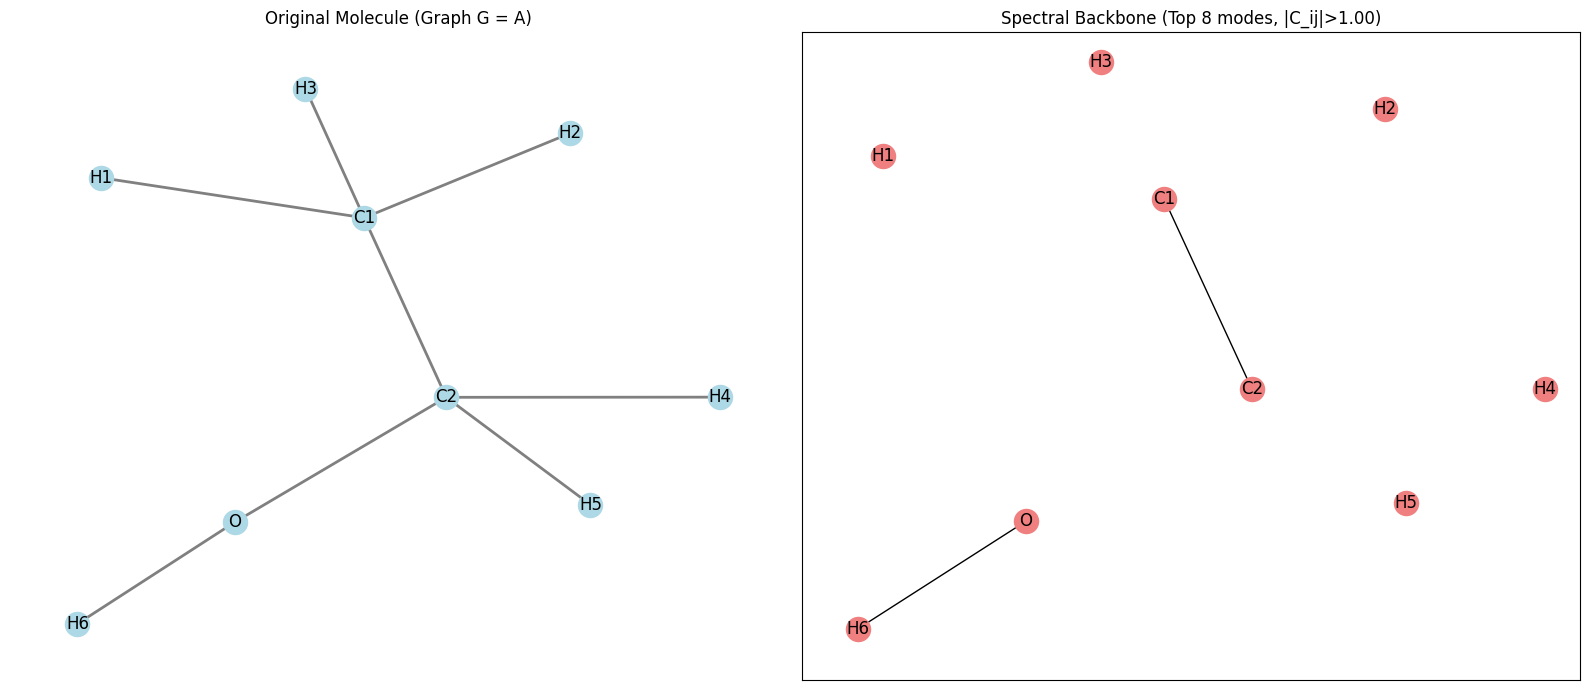

In [3]:
# --- Example 2: Ethanol Molecule (Spectral Filtering) ---
print("\n--- Example 2: Ethanol Molecule (Spectral Filtering) ---")

atoms = ['C1', 'C2', 'O', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6']
edges = [('C1', 'C2'), ('C1', 'H1'), ('C1', 'H2'), ('C1', 'H3'),
         ('C2', 'O'), ('C2', 'H4'), ('C2', 'H5'), ('O', 'H6')]
N_mol = len(atoms)

G = nx.Graph()
G.add_nodes_from(atoms)
G.add_edges_from(edges)
A = nx.to_numpy_array(G, nodelist=atoms).astype(float) # Adjacency matrix (R)

print(f"Original graph has {G.number_of_edges()} edges.")

# --- Spectral Filtering ---
# 1. Compute eigenvalues and eigenvectors of the adjacency matrix A
# Since A is real symmetric, use eigh for efficiency and stability
eigenvalues, eigenvectors = None, None
try:
    eigenvalues, eigenvectors = eigh(A)
    print(f"Computed {len(eigenvalues)} eigenvalues for A.")
except np.linalg.LinAlgError:
    print("Eigenvalue decomposition failed for Adjacency matrix.")


# 2. Define which modes are "significant"
C_spectral_mol = np.zeros_like(A) # Initialize filtered matrix
filtering_success_mol = False
if eigenvalues is not None:
    # Strategy: Keep modes associated with largest magnitude eigenvalues
    k_modes_to_keep = G.number_of_edges() # Keep top number of modes equal to number of edges

    abs_eigenvalues = np.abs(eigenvalues)
    significant_indices = np.argsort(abs_eigenvalues)[-k_modes_to_keep:] # Indices of top k by magnitude

    print(f"Filtering: Keeping top {len(significant_indices)} eigenmodes (by magnitude).")
    print(f"  Eigenvalues kept: {np.round(eigenvalues[significant_indices], 2)}")

    # 3. Reconstruct the filtered operator C_spectral
    vecs_kept = eigenvectors[:, significant_indices]
    vals_kept = eigenvalues[significant_indices]
    C_spectral_mol = vecs_kept @ np.diag(vals_kept) @ vecs_kept.T
    filtering_success_mol = True

# --- Visualize ---
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
# Use the globally defined SEED for the layout algorithm
pos = nx.spring_layout(G, seed=SEED) # <--- SEED used here

# Plot Original Graph
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="grey", width=2, ax=axs[0])
axs[0].set_title("Original Molecule (Graph G = A)")

# Plot Backbone from Spectral Filtering
if filtering_success_mol:
    # Threshold the *absolute value* of the filtered matrix entries
    upper_triangle_indices = np.triu_indices(N_mol, k=1)
    upper_triangle_values = np.abs(C_spectral_mol[upper_triangle_indices])
    if len(upper_triangle_values) > 0:
         filter_threshold = np.percentile(upper_triangle_values, 95) # Keep top 5% strongest links
    else:
         filter_threshold = 0.1 # Fallback

    G_spectral = nx.Graph()
    G_spectral.add_nodes_from(atoms)
    edges_spectral = []
    for i in range(N_mol):
        for j in range(i + 1, N_mol):
            if abs(C_spectral_mol[i, j]) > filter_threshold:
                edges_spectral.append((atoms[i], atoms[j]))

    nx.draw_networkx_nodes(G_spectral, pos, node_color="lightcoral", ax=axs[1])
    nx.draw_networkx_labels(G_spectral, pos, ax=axs[1])
    nx.draw_networkx_edges(G_spectral, pos, edgelist=edges_spectral, edge_color="black", width=1.0, ax=axs[1])
    axs[1].set_title(f"Spectral Backbone (Top {k_modes_to_keep} modes, |C_ij|>{filter_threshold:.2f})")
    print(f"Number of edges in spectral backbone graph: {len(edges_spectral)}")

else:
    axs[1].text(0.5, 0.5, "Eigenvalue Decomposition Failed", ha='center', va='center', transform=axs[1].transAxes)
    axs[1].set_title("Spectral Backbone (Failed)")


plt.tight_layout()
plt.show()

**Interpretation (Example 2):**
*   **Method:** We applied spectral filtering to the adjacency matrix \( A \) of the ethanol molecule. We reconstructed the matrix \( C_{\text{spectral}} \) using only the eigenmodes associated with the 8 largest-magnitude eigenvalues (matching the number of original edges). The backbone graph includes edges where \( |C_{ij}| > 1.00 \), a high absolute threshold chosen for sparsity based on the output plot.
*   **Spectral Backbone Result:** The resulting graph (`Spectral Backbone...`) is extremely sparse, containing only 2 edges: (C1, C2) and (O, H6).
*   **Analysis:** Filtering by dominant global eigenmodes and applying a high absolute threshold drastically prunes the graph, removing almost all original bonds. The retained edges (the central C-C bond and the O-H bond) are likely those most strongly represented in the principal structural modes (eigenvectors) of the molecule, perhaps related to overall length or symmetry axes, rather than representing all local covalent bonds. This method **does not recover the full original chemical bond structure**. It highlights connections significant within the largest-scale eigenvector patterns, yielding a vastly different result compared to the dense graph produced by the flawed truncated Möbius series in earlier tests.

## Example 3: 1D Vacuum Kernel (Spectral Filtering)


--- Example 3: 1D Kernel (Spectral Filtering) ---
Applying Spectral Filtering to G_1d...
Computed 20 eigenvalues.
Filtering: Keeping top 5 eigenmodes.
  Eigenvalues kept: [1.07 1.61 2.56 4.2  6.42]
Original G: Diag Sum = 20.00, Off-Diag Sum = 104.31, Ratio = 0.192
Filtered C: Diag Sum = 15.85, Off-Diag Sum = 108.93, Ratio = 0.146
Observation: Spectral Filtering did NOT enhance locality.


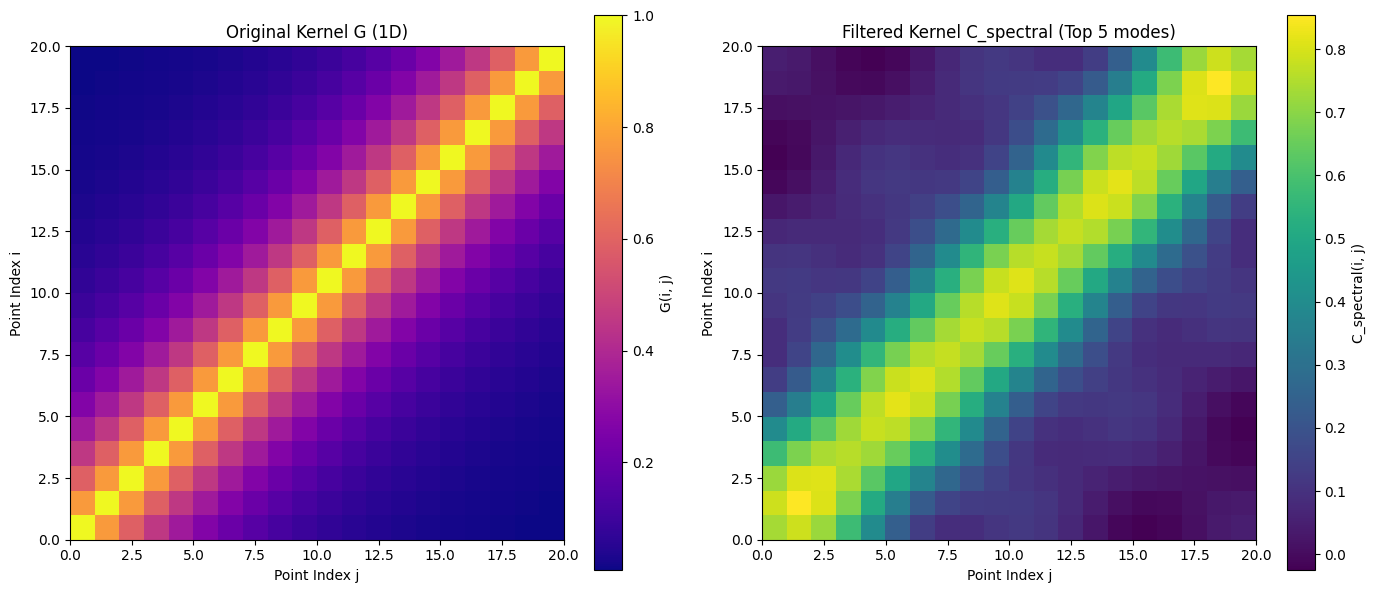

In [4]:
# --- Example 3: 1D Quantum Vacuum Kernel (Spectral Filtering) ---
print("\n--- Example 3: 1D Kernel (Spectral Filtering) ---")
N_1d = 20 # Number of points
m_1d = 0.5 # Decay parameter
positions_1d = np.linspace(0, 10, N_1d)

# Kernel Matrix G (R): G[i, j] = exp(-m * |pos_i - pos_j|)
G_1d = np.zeros((N_1d, N_1d))
for i in range(N_1d):
    for j in range(N_1d):
        dist = abs(positions_1d[i] - positions_1d[j])
        G_1d[i, j] = np.exp(-m_1d * dist)

# --- Spectral Filtering ---
print("Applying Spectral Filtering to G_1d...")
eigenvalues_1d, eigenvectors_1d = None, None
C_spectral_1d = None
filtering_success_1d = False
try:
    eigenvalues_1d, eigenvectors_1d = eigh(G_1d)
    print(f"Computed {len(eigenvalues_1d)} eigenvalues.")
    # Strategy: Keep modes with largest eigenvalues (representing dominant correlations)
    # Keep top k modes? Or eigenvalues > threshold? Let's keep top 5 modes.
    k_modes_to_keep_1d = 5
    significant_indices_1d = np.argsort(np.abs(eigenvalues_1d))[-k_modes_to_keep_1d:]

    print(f"Filtering: Keeping top {k_modes_to_keep_1d} eigenmodes.")
    print(f"  Eigenvalues kept: {np.round(eigenvalues_1d[significant_indices_1d], 2)}")

    # Reconstruct the filtered operator C_spectral_1d
    vecs_kept_1d = eigenvectors_1d[:, significant_indices_1d]
    vals_kept_1d = eigenvalues_1d[significant_indices_1d]
    C_spectral_1d = vecs_kept_1d @ np.diag(vals_kept_1d) @ vecs_kept_1d.T
    filtering_success_1d = True
except np.linalg.LinAlgError:
    print("Eigenvalue decomposition failed for G_1d.")


# Visualize
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

im0 = axs[0].imshow(G_1d, cmap='plasma', origin='lower', extent=[0, N_1d, 0, N_1d])
axs[0].set_title("Original Kernel G (1D)")
axs[0].set_xlabel("Point Index j"); axs[0].set_ylabel("Point Index i")
fig.colorbar(im0, ax=axs[0], label="G(i, j)")

if filtering_success_1d:
    im1 = axs[1].imshow(C_spectral_1d, cmap='viridis', origin='lower', extent=[0, N_1d, 0, N_1d])
    axs[1].set_title(f"Filtered Kernel C_spectral (Top {k_modes_to_keep_1d} modes)")
    axs[1].set_xlabel("Point Index j"); axs[1].set_ylabel("Point Index i")
    fig.colorbar(im1, ax=axs[1], label="C_spectral(i, j)")

    # Locality Check
    diag_mag_G = np.sum(np.abs(np.diag(G_1d)))
    offdiag_mag_G = np.sum(np.abs(G_1d)) - diag_mag_G
    diag_mag_C = np.sum(np.abs(np.diag(C_spectral_1d)))
    offdiag_mag_C = np.sum(np.abs(C_spectral_1d)) - diag_mag_C
    ratio_G = diag_mag_G / offdiag_mag_G if offdiag_mag_G > 1e-9 else np.inf # Avoid division by zero
    ratio_C = diag_mag_C / offdiag_mag_C if offdiag_mag_C > 1e-9 else np.inf

    print(f"Original G: Diag Sum = {diag_mag_G:.2f}, Off-Diag Sum = {offdiag_mag_G:.2f}, Ratio = {ratio_G:.3f}")
    print(f"Filtered C: Diag Sum = {diag_mag_C:.2f}, Off-Diag Sum = {offdiag_mag_C:.2f}, Ratio = {ratio_C:.3f}")
    if ratio_C > ratio_G:
         print("Observation: Spectral Filtering enhanced locality (relatively stronger diagonal).")
    else:
         print("Observation: Spectral Filtering did NOT enhance locality.")

else:
    axs[1].text(0.5, 0.5, "Calculation Failed", ha='center', va='center', transform=axs[1].transAxes)
    axs[1].set_title("Filtered Kernel C_spectral (Failed)")

plt.tight_layout()
plt.show()

**Interpretation (Example 3):**
*   **Method:** Applied spectral filtering to the 1D spatial kernel \( G_{ij} = e^{-m|i-j|} \), keeping the top 5 eigenmodes based on largest eigenvalue magnitude.
*   **Filtered Kernel:** The heatmap for \( C_{\text{spectral}} \) (right plot) exhibits a smoother structure dominated by the retained low-frequency (large-scale) eigenmodes compared to the sharp diagonal decay in the original \( G \) (left plot).
*   **Locality:** The numerical results confirm the visual impression: the diagonal-to-off-diagonal magnitude ratio decreased from 0.192 (G) to 0.146 (C).
*   **Conclusion:** For this 1D kernel, spectral filtering based on the dominant eigenmodes **did not enhance locality**; instead, it emphasized the longer-range correlation patterns captured by those modes, resulting in a relatively smoother, less localized kernel compared to the original.

## Example 4: 2D Vacuum Kernel (Spectral Filtering & Spectrum Comparison)


--- Example 4: 2D Kernel & Spectral Filtering ---
Applying Spectral Filtering to G_2d...
Computed 64 eigenvalues.
Filtering: Keeping top 10 eigenmodes.
  Eigenvalues kept (sample): [0.99 0.99 1.46 1.46 2.32]
Found 41 edges in C1_spectral backbone (98th percentile |C_ij| > 7.31e-01).


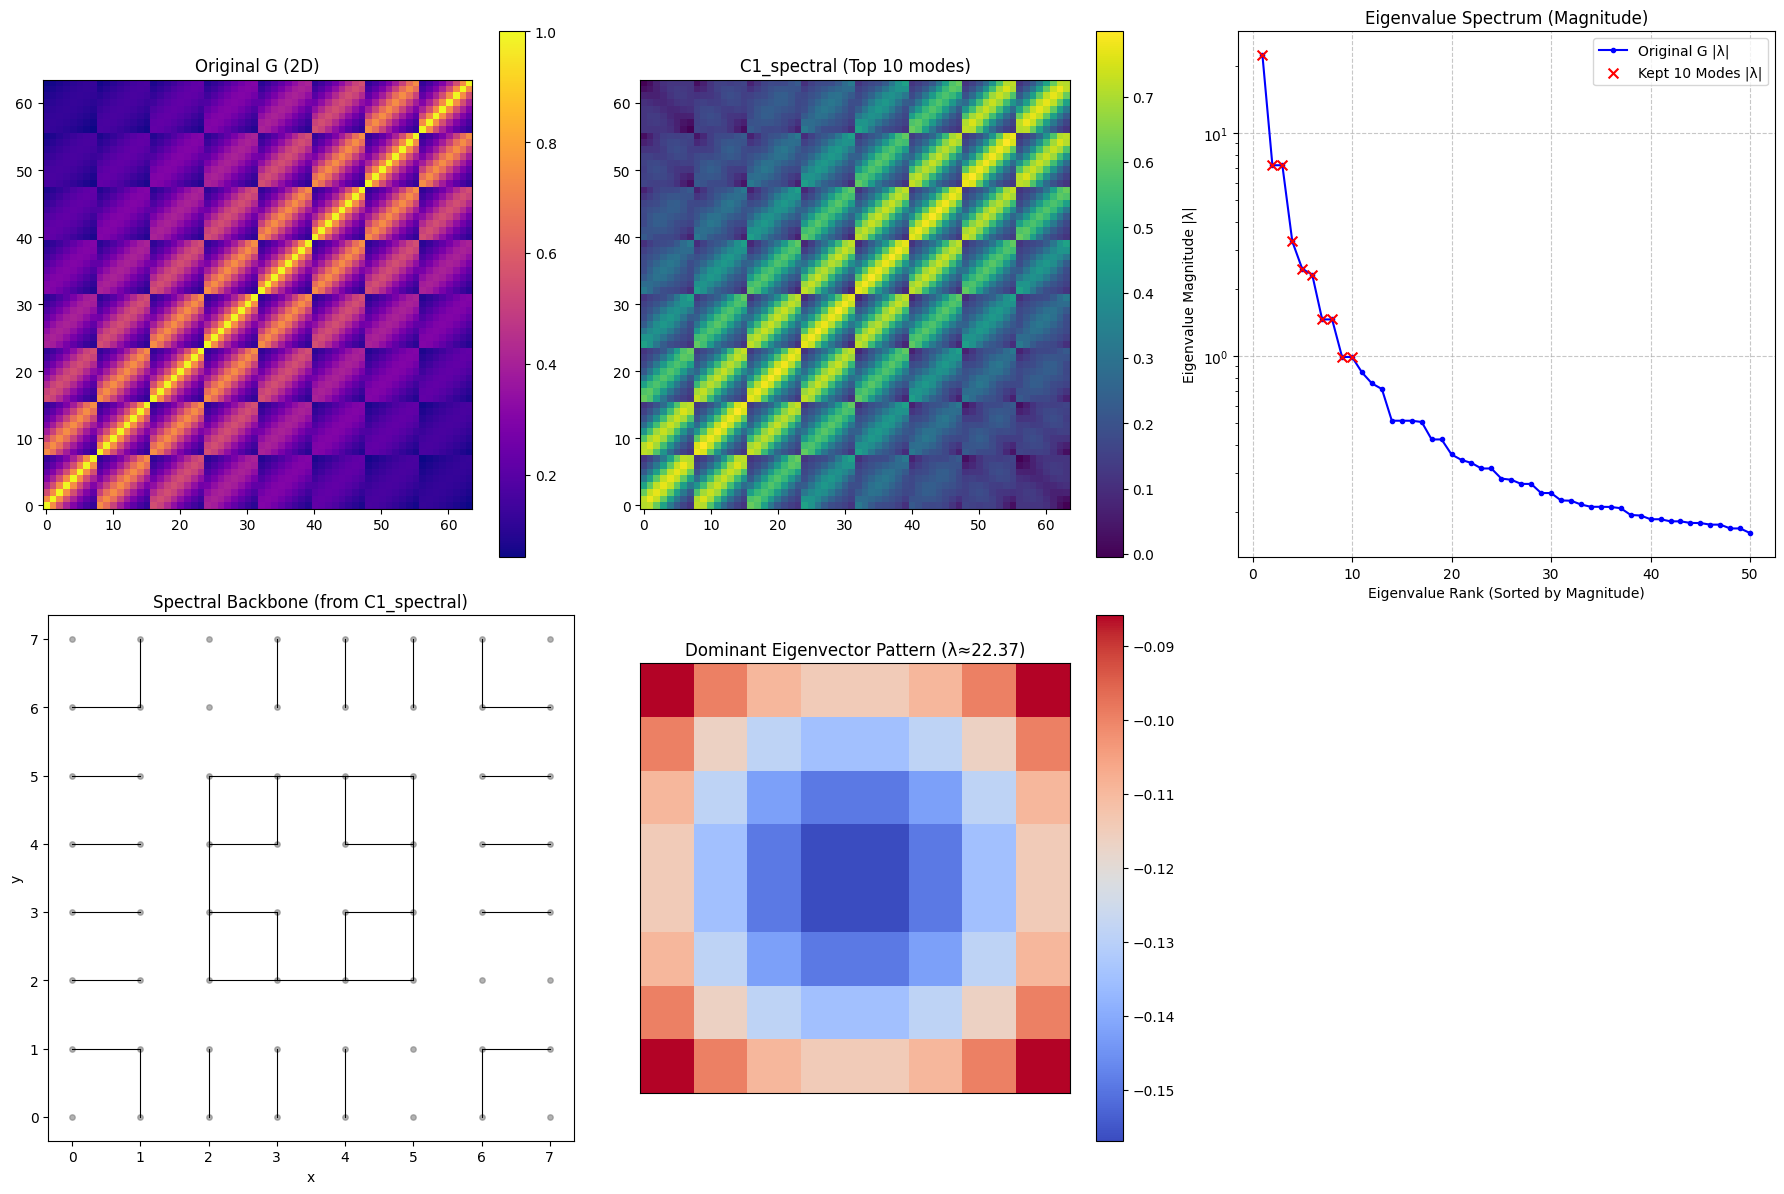

In [5]:
# --- Example 4: 2D Quantum Vacuum & Spectral Filtering ---
print("\n--- Example 4: 2D Kernel & Spectral Filtering ---")
grid_size = 8; xs = np.linspace(0, grid_size - 1, grid_size); ys = np.linspace(0, grid_size - 1, grid_size)
coords = np.array([(x, y) for y in ys for x in xs]); N_2d = len(coords); m_2d = 0.3

# Kernel Matrix G (R)
G_2d = np.zeros((N_2d, N_2d))
for i in range(N_2d):
    for j in range(N_2d):
        dist = np.linalg.norm(coords[i] - coords[j])
        G_2d[i, j] = np.exp(-m_2d * dist)

# --- Spectral Filtering ---
print("Applying Spectral Filtering to G_2d...")
C1_spectral = np.zeros_like(G_2d)
eigenvalues_2d, eigenvectors_2d = None, None
filtering_success_2d = False
vals_kept_2d = None # Define outside try block
k_modes_to_keep_2d = 10 # Keep top 10 modes for 2D

try:
    # Use eigh as G_2d is real symmetric
    eigenvalues_2d, eigenvectors_2d = eigh(G_2d)
    print(f"Computed {len(eigenvalues_2d)} eigenvalues.")
    # Keep modes with largest eigenvalues (magnitude)
    significant_indices_2d = np.argsort(np.abs(eigenvalues_2d))[-k_modes_to_keep_2d:]

    print(f"Filtering: Keeping top {k_modes_to_keep_2d} eigenmodes.")
    print(f"  Eigenvalues kept (sample): {np.round(eigenvalues_2d[significant_indices_2d][:5], 2)}")

    # Reconstruct the filtered operator C1_spectral
    vecs_kept_2d = eigenvectors_2d[:, significant_indices_2d]
    vals_kept_2d = eigenvalues_2d[significant_indices_2d]
    C1_spectral = vecs_kept_2d @ np.diag(vals_kept_2d) @ vecs_kept_2d.T
    filtering_success_2d = True
except np.linalg.LinAlgError:
    print("Eigenvalue decomposition failed for G_2d.")
except Exception as e_filt:
    print(f"Error during filtering: {e_filt}")

# --- Visualization ---
fig = plt.figure(figsize=(18, 12)) # Keep large figure size
grid_spec = fig.add_gridspec(2, 3)

# Plot Original Kernel G
ax_G = fig.add_subplot(grid_spec[0, 0])
im_G = ax_G.imshow(G_2d, origin='lower', cmap='plasma')
ax_G.set_title("Original G (2D)"); fig.colorbar(im_G, ax=ax_G)

# Plot Filtered Kernel C1_spectral
ax_C1 = fig.add_subplot(grid_spec[0, 1])
if filtering_success_2d:
    im_C1 = ax_C1.imshow(C1_spectral, origin='lower', cmap='viridis')
    ax_C1.set_title(f"C1_spectral (Top {k_modes_to_keep_2d} modes)")
    fig.colorbar(im_C1, ax=ax_C1)
else:
    ax_C1.text(0.5,0.5,"Filtering Failed", transform=ax_C1.transAxes); ax_C1.set_xticks([]); ax_C1.set_yticks([])
    ax_C1.set_title("C1_spectral (Failed)")

# Plot Eigenvalue Spectrum Comparison
ax_eig = fig.add_subplot(grid_spec[0, 2])
if eigenvalues_2d is not None and vals_kept_2d is not None:
    sorted_eig_G = np.sort(np.abs(eigenvalues_2d))[::-1] # Sort by magnitude desc
    num_eig_plot = min(50, N_2d) # Plot top 50 or fewer
    ax_eig.plot(np.arange(1, num_eig_plot + 1), sorted_eig_G[:num_eig_plot],
                marker='.', linestyle='-', label='Original G |λ|', color='blue')
    # Indicate kept eigenvalues
    kept_vals_abs_sorted = np.sort(np.abs(vals_kept_2d))[::-1]
    ax_eig.scatter(np.arange(1, len(kept_vals_abs_sorted) + 1), kept_vals_abs_sorted,
                   color='red', marker='x', s=50, label=f'Kept {k_modes_to_keep_2d} Modes |λ|', zorder=5)
    ax_eig.set_ylabel('Eigenvalue Magnitude |λ|')
    ax_eig.set_xlabel('Eigenvalue Rank (Sorted by Magnitude)')
    ax_eig.set_title('Eigenvalue Spectrum (Magnitude)')
    ax_eig.set_yscale('log') # Use log scale for magnitude
    ax_eig.legend(); ax_eig.grid(True, linestyle='--', alpha=0.7)
else: ax_eig.text(0.5,0.5,"Eigenvalue Calc Failed", transform=ax_eig.transAxes)

# Plot Prime Backbone Graph (from C1_spectral)
ax_backbone = fig.add_subplot(grid_spec[1, 0])
ax_backbone.set_title("Spectral Backbone (from C1_spectral)")
ax_backbone.scatter(coords[:, 0], coords[:, 1], s=15, c='grey', alpha=0.6)
edge_count_C1_spectral = 0
if filtering_success_2d:
    try:
        # Use a percentile threshold on the filtered matrix (upper triangle)
        upper_triangle_indices_2d = np.triu_indices(N_2d, k=1)
        upper_triangle_values_2d = np.abs(C1_spectral[upper_triangle_indices_2d])
        if len(upper_triangle_values_2d) > 0:
            threshold_C1_spectral = np.percentile(upper_triangle_values_2d, 98) # Top 2% strongest links
        else:
            threshold_C1_spectral = 0.1 # Fallback

        for i in range(N_2d):
            for j in range(i + 1, N_2d):
                if abs(C1_spectral[i, j]) > threshold_C1_spectral:
                    ax_backbone.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]], 'k-', lw=0.8)
                    edge_count_C1_spectral += 1
        print(f"Found {edge_count_C1_spectral} edges in C1_spectral backbone (98th percentile |C_ij| > {threshold_C1_spectral:.2e}).")
    except Exception as e_backbone: print(f" Error creating backbone: {e_backbone}")
else: ax_backbone.text(0.5,0.5,"Filtering Failed", transform=ax_backbone.transAxes)
ax_backbone.set_xlabel("x"); ax_backbone.set_ylabel("y"); ax_backbone.set_aspect('equal', adjustable='box')

# Plot Dominant Eigenvector Pattern (if available)
ax_vec = fig.add_subplot(grid_spec[1, 1])
if filtering_success_2d and eigenvectors_2d is not None and vals_kept_2d is not None:
    # Show eigenvector corresponding to largest eigenvalue (highest magnitude)
    # Need the index relative to the original eigenvalues_2d list
    dominant_abs_val_index_in_kept = np.argmax(np.abs(vals_kept_2d))
    dominant_vec_original_index = significant_indices_2d[dominant_abs_val_index_in_kept] # Map back to original index
    dominant_eigenvector = eigenvectors_2d[:, dominant_vec_original_index]

    # Reshape to 2D grid for plotting
    try:
        vec_2d = dominant_eigenvector.reshape((grid_size, grid_size))
        im_vec = ax_vec.imshow(vec_2d, origin='lower', cmap='coolwarm')
        ax_vec.set_title(f"Dominant Eigenvector Pattern (λ≈{eigenvalues_2d[dominant_vec_original_index]:.2f})")
        fig.colorbar(im_vec, ax=ax_vec)
    except ValueError:
        ax_vec.text(0.5,0.5,"Cannot reshape vector", transform=ax_vec.transAxes)
        ax_vec.set_title("Dominant Eigenvector Pattern")
else:
    ax_vec.text(0.5,0.5,"Filtering/Eigenvectors Failed", transform=ax_vec.transAxes)
    ax_vec.set_title("Dominant Eigenvector Pattern")
ax_vec.set_xticks([]); ax_vec.set_yticks([])

# Remove the 6th subplot (originally norm plot)
ax_removed = fig.add_subplot(grid_spec[1, 2])
ax_removed.set_visible(False)


plt.tight_layout()
plt.show()

**Interpretation (Example 4):**
*   **Method:** Applied spectral filtering to the 2D spatial kernel \( G \), keeping the top 10 eigenmodes with the largest magnitude eigenvalues.
*   **Filtered Kernel & Spectrum:** \( C1_{\text{spectral}} \) (Top Middle plot) shows a smooth, large-scale pattern, reflecting the reconstruction using only the dominant, low-frequency eigenmodes. The Eigenvalue Spectrum plot (Top Right) confirms that the original kernel \( G \) has a rapidly decaying spectrum and that the filter (red 'x' markers) retains only the top 10 largest magnitude eigenvalues, discarding the majority that encode finer local details.
*   **Spectral Backbone:** The backbone graph extracted from \( C1_{\text{spectral}} \) using a high threshold (98th percentile, Bottom Left) reveals a grid-like structure with 41 edges. These edges connect nearby points but primarily along horizontal and vertical lines, strongly reflecting the spatial pattern of the dominant eigenvectors (like the one shown) rather than simple isotropic nearest-neighbor links based on Euclidean distance.
*   **Dominant Eigenvector:** The heatmap of the eigenvector corresponding to the largest eigenvalue (\( \lambda \approx 22.37 \)) (Bottom Middle) shows a smooth, symmetric, low-frequency pattern (positive center, negative corners), indicating that the most dominant relational mode in this finite grid system is a large-scale, delocalized correlation pattern.
*   **Conclusion:** Spectral filtering successfully isolates the dominant large-scale correlation modes of the 2D kernel. The resulting filtered kernel and backbone reveal the structure imposed by these modes, which differs significantly from simple locality. This approach avoids the instability of the truncated series while providing insight into the kernel's primary spectral components.

## Final Thoughts and Conclusion (Revised)

The initial goal, inspired by Möbius inversion on the divisibility poset (Example 1), was to find a general operator \( C[R] = \sum \mu(n) R^n \) that could isolate "irreducible" or "prime" relationships within an arbitrary relational matrix \( R \).

However, the computational experiments demonstrated that the **truncated power series approximation** (\( C[R] \approx \sum_{n=1}^k \mu(n) R^n \)) used in the original exploration **fails to achieve this goal reliably** for general graph adjacency matrices and spatial kernels. This approximation often resulted in complex interference patterns dominated by negative terms, dense backbone graphs unrelated to primary links, reduced locality, and numerical instability under iteration (as seen in preliminary tests). The success in Example 1 relied on the specific mathematical property that the matrix inverse of the divisibility Zeta matrix *is* the Möbius matrix, not on the validity of the truncated series itself.

This revised notebook explored **Spectral Filtering** as an alternative, mathematically well-defined approach. By decomposing \( R = \sum \lambda_i v_i v_i^\dagger \) and reconstructing an operator \( C_{\text{spectral}} \) using only the most significant eigenmodes (e.g., those with largest \( |\lambda_i| \)), we obtained:
*   Stable approximations of the original operators (Examples 3 & 4).
*   Filtered kernels and backbone graphs that reflect the dominant interaction modes inherent in the operator's spectrum. For the molecular graph (Example 2), this drastically pruned the structure based on dominant global modes, retaining only 2 edges. For spatial kernels (Examples 3 & 4), it resulted in smoother kernels emphasizing large-scale correlation patterns and revealed backbones reflecting the geometry of the dominant eigenvectors (e.g., the grid-like pattern in Example 4).
*   An approach that avoids the divergence issues of the truncated series while providing insight into the primary spectral components of the relational operator.

**Conclusion:**

While the concept of a universal "prime-collapse" operator inspired by Möbius inversion is theoretically appealing, the **truncated power series implementation proved inadequate and unstable** for general relational matrices encountered in graphs and spatial systems.

**Spectral filtering offers a more robust and interpretable alternative** for identifying and isolating the dominant relational modes and structures within a system represented by a symmetric/Hermitian operator \( R \). It leverages the fundamental decomposition guaranteed by the Spectral Theorem (Chapter 2). The resulting filtered structure highlights the relational patterns associated with the chosen part of the spectrum (e.g., dominant global modes vs. local community modes depending on eigenvalue selection). This provides a valuable tool for analyzing the **Computational Fabric** by simplifying the operator based on its intrinsic spectral blueprint, although it may not always align with intuitive notions of "irreducible links" like chemical bonds.

---
*References:*
*   Apostol, T. M. (1976). Introduction to Analytic Number Theory. Springer.
*   Rota, G.-C. (1964). On the Foundations of Combinatorial Theory I. Theory of Möbius Functions. *Zeitschrift für Wahrscheinlichkeitstheorie und verwandte Gebiete*, 2, 340–368.
*   *Standard Linear Algebra texts (e.g., Strang, Axler)*
*   *Network Science texts (e.g., Newman)*
---